In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Reading file

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [5]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [8]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

# Drop unnecessary columns

In [9]:
df.drop(df.iloc[:, :3], axis=1, inplace=True)

In [10]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


# EDA

### Univariate Analysis

In [11]:
sns.set_style("darkgrid")

**Distribution of data**

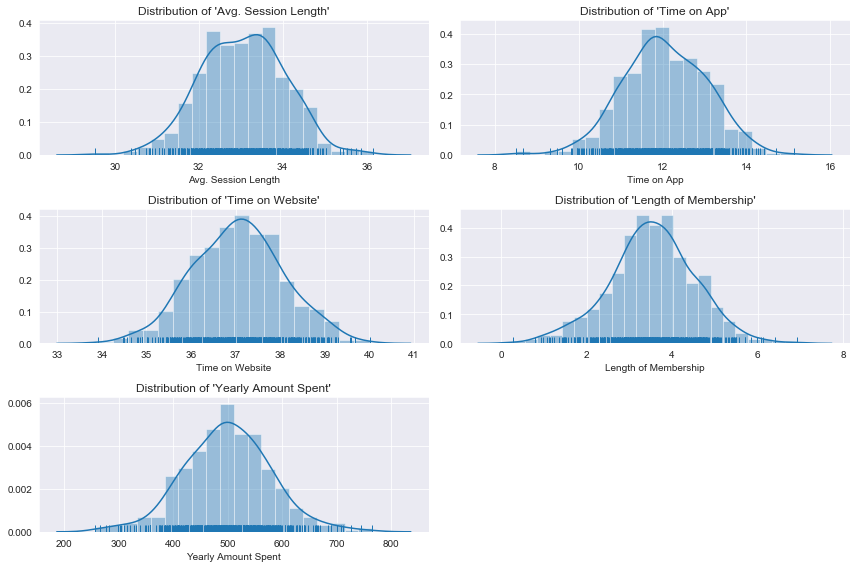

In [12]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns,1):
    plt.subplot(3,2, i)
    plt.title("Distribution of '" + col + "'")
    sns.distplot(df[col], rug=True)
    plt.tight_layout()

**All the columns have normal distribution**

### Boxplot of features

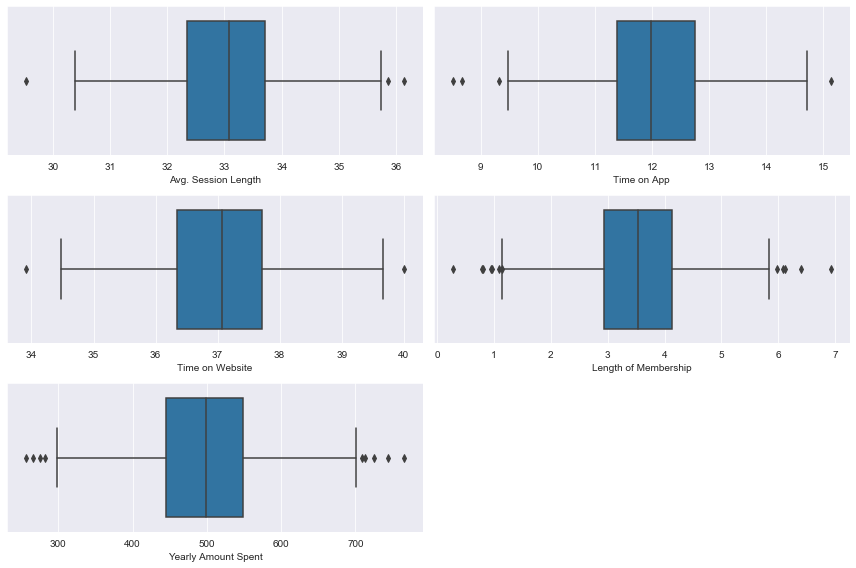

In [13]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns,1):
    plt.subplot(3,2, i)
    sns.boxplot(df[col])
    plt.tight_layout()

### Bivariate Analysis

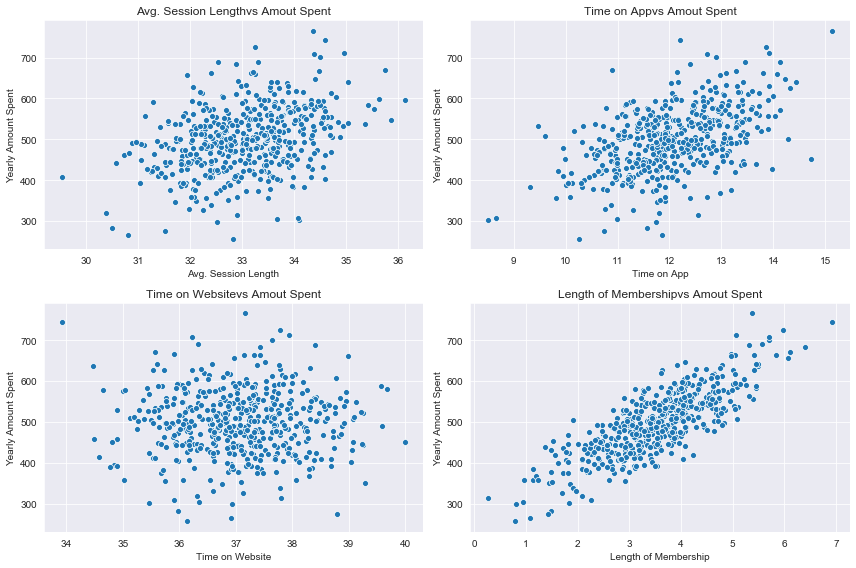

In [14]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns[:-1],1):
    plt.subplot(2,2, i)
    plt.title(col + "vs Amout Spent")
    sns.scatterplot(df[col], df["Yearly Amount Spent"])
    plt.tight_layout()

**Membership length has a linear relation with the amount spent**

### The mighty pairplot

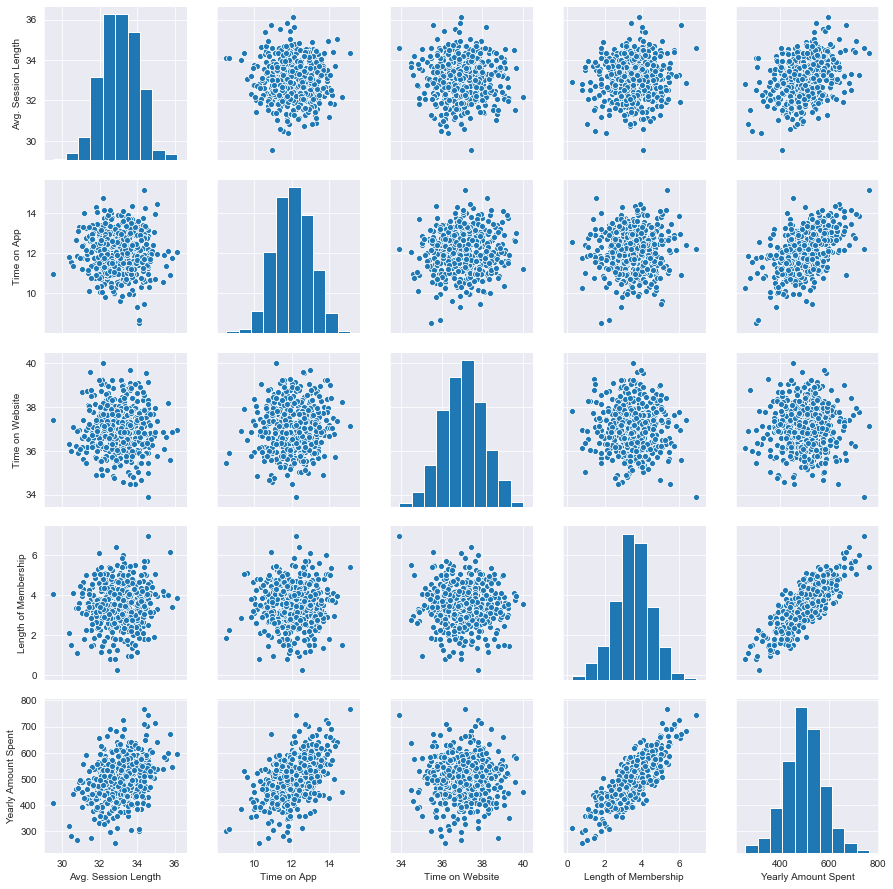

In [15]:
sns.pairplot(df)

# Outlier Treatment

### Remove data points which are further then 3 std deviations away from mean

In [16]:
def removeOutliers(col, i, df1):
    
    df = df1.copy()
    
    df["zscore" + str(i)] = ((df[col]-df[col].mean()) / df[col].std())
    bool_series = np.abs(df["zscore" + str(i)])<3
    
    df = df[bool_series]
    display(df.head())
    display(df.shape)
    print("outliers removed:", df1.shape[0] - df.shape[0])
    
    return df
    

In [17]:
for i, col in enumerate(df.columns, 1):
    df = removeOutliers(col, i, df)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,zscore1
0,34.497268,12.655651,39.577668,4.082621,587.951054,1.454894
1,31.926272,11.109461,37.268959,2.664034,392.204933,-1.135365
2,33.000915,11.330278,37.110597,4.104543,487.547505,-0.052670
3,34.305557,13.717514,36.721283,3.120179,581.852344,1.261747
4,33.330673,12.795189,37.536653,4.446308,599.406092,0.279558


(498, 6)

outliers removed: 2


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,zscore1,zscore2
0,34.497268,12.655651,39.577668,4.082621,587.951054,1.454894,0.603982
1,31.926272,11.109461,37.268959,2.664034,392.204933,-1.135365,-0.949965
2,33.000915,11.330278,37.110597,4.104543,487.547505,-0.052670,-0.728040
3,34.305557,13.717514,36.721283,3.120179,581.852344,1.261747,1.671172
4,33.330673,12.795189,37.536653,4.446308,599.406092,0.279558,0.744220


(495, 7)

outliers removed: 3


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,zscore1,zscore2,zscore3
0,34.497268,12.655651,39.577668,4.082621,587.951054,1.454894,0.603982,2.483696
1,31.926272,11.109461,37.268959,2.664034,392.204933,-1.135365,-0.949965,0.201348
2,33.000915,11.330278,37.110597,4.104543,487.547505,-0.052670,-0.728040,0.044795
3,34.305557,13.717514,36.721283,3.120179,581.852344,1.261747,1.671172,-0.340074
4,33.330673,12.795189,37.536653,4.446308,599.406092,0.279558,0.744220,0.465986


(494, 8)

outliers removed: 1


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,zscore1,zscore2,zscore3,zscore4
0,34.497268,12.655651,39.577668,4.082621,587.951054,1.454894,0.603982,2.483696,0.563800
1,31.926272,11.109461,37.268959,2.664034,392.204933,-1.135365,-0.949965,0.201348,-0.876144
2,33.000915,11.330278,37.110597,4.104543,487.547505,-0.052670,-0.728040,0.044795,0.586052
3,34.305557,13.717514,36.721283,3.120179,581.852344,1.261747,1.671172,-0.340074,-0.413132
4,33.330673,12.795189,37.536653,4.446308,599.406092,0.279558,0.744220,0.465986,0.932963


(493, 9)

outliers removed: 1


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,zscore1,zscore2,zscore3,zscore4,zscore5
0,34.497268,12.655651,39.577668,4.082621,587.951054,1.454894,0.603982,2.483696,0.563800,1.156771
1,31.926272,11.109461,37.268959,2.664034,392.204933,-1.135365,-0.949965,0.201348,-0.876144,-1.401114
2,33.000915,11.330278,37.110597,4.104543,487.547505,-0.052670,-0.728040,0.044795,0.586052,-0.155238
3,34.305557,13.717514,36.721283,3.120179,581.852344,1.261747,1.671172,-0.340074,-0.413132,1.077077
4,33.330673,12.795189,37.536653,4.446308,599.406092,0.279558,0.744220,0.465986,0.932963,1.306458


(491, 10)

outliers removed: 2


# Building Model

### Splitting data

In [18]:
X = df.drop(df.loc[:, "Yearly Amount Spent":], axis = 1)
y = df["Yearly Amount Spent"]

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

### Lets build a regression model first

In [19]:
linear_model= LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Test the model**

In [20]:
linear_model.score(X_test, y_test)

0.9795317548179964

**Dayumm!**

**Visualize predictions against test data**

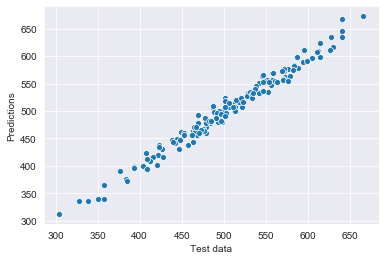

In [21]:
pred = linear_model.predict(X_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Test data")
plt.ylabel("Predictions")
plt.show()

### Lets now build other models

In [22]:
models = {
    "                    Linear Regression": LinearRegression(),
    "                                Ridge": Ridge(),
    "                                Lasso": Lasso(),
    "                  K Nearest Neighbors": KNeighborsRegressor(),
    "                        Random Forest": RandomForestRegressor(),
        }

### Define some utility functions

In [23]:
def train():
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [24]:
def test():
    for name, model in models.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')
                     

In [25]:
def evaluate():
    for name, model in models.items():
        predictions = model.predict(X_test)
        print(name)
        print("--------------------"*3)
        print('MAE:  {:.5f}'.format(mean_absolute_error(y_test, predictions)))
        print('MSE:  {:.5f}'.format(mean_squared_error(y_test, predictions)))
        print('RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_test, predictions))))
        print('r2:   {:.5f}'.format(r2_score(y_test, predictions)))
        print("--------------------"*3)
        print('\n')
                     
        

# Training

In [26]:
train()

                    Linear Regression trained.
                                Ridge trained.
                                Lasso trained.
                  K Nearest Neighbors trained.
                        Random Forest trained.


# Testing

In [27]:
test()

                    Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.97953
Training Accuracy: 0.98359
------------------------------------------------------------


                                Ridge
------------------------------------------------------------
Testing Accuracy: 0.97960
Training Accuracy: 0.98359
------------------------------------------------------------


                                Lasso
------------------------------------------------------------
Testing Accuracy: 0.97939
Training Accuracy: 0.98308
------------------------------------------------------------


                  K Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.90978
Training Accuracy: 0.93742
------------------------------------------------------------


                        Random Forest
------------------------------------------------------------
Testing Accuracy: 0.92750
Training Accura

# Evaluation

In [28]:
evaluate()

                    Linear Regression
------------------------------------------------------------
MAE:  8.37700
MSE:  105.12808
RMSE: 10.25320
r2:   0.97953
------------------------------------------------------------


                                Ridge
------------------------------------------------------------
MAE:  8.36702
MSE:  104.79398
RMSE: 10.23689
r2:   0.97960
------------------------------------------------------------


                                Lasso
------------------------------------------------------------
MAE:  8.39331
MSE:  105.84120
RMSE: 10.28792
r2:   0.97939
------------------------------------------------------------


                  K Nearest Neighbors
------------------------------------------------------------
MAE:  16.93752
MSE:  463.36396
RMSE: 21.52589
r2:   0.90978
------------------------------------------------------------


                        Random Forest
------------------------------------------------------------
MAE:  14.95799
M

# Hypertuning

In [29]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

forest = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
forest.fit(X_train, y_train)
forest.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [30]:
estimator = KNeighborsRegressor()
parameters = {
            'weights': ['uniform', 'distance'], 
            'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
            }
knn = GridSearchCV(estimator, parameters)
knn.fit(X_train, y_train)
knn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [31]:
models = {
    "                    Linear Regression": LinearRegression(),
    "                                Ridge": Ridge(),
    "                                Lasso": Lasso(),
    "                  K Nearest Neighbors": KNeighborsRegressor(),
    "                        Random Forest": RandomForestRegressor(bootstrap=True, max_features="auto", 
                                                                   min_samples_split=2, n_estimators=30),
         }

In [32]:
train()

                    Linear Regression trained.
                                Ridge trained.
                                Lasso trained.
                  K Nearest Neighbors trained.
                        Random Forest trained.


In [33]:
test()

                    Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.97953
Training Accuracy: 0.98359
------------------------------------------------------------


                                Ridge
------------------------------------------------------------
Testing Accuracy: 0.97960
Training Accuracy: 0.98359
------------------------------------------------------------


                                Lasso
------------------------------------------------------------
Testing Accuracy: 0.97939
Training Accuracy: 0.98308
------------------------------------------------------------


                  K Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.90978
Training Accuracy: 0.93742
------------------------------------------------------------


                        Random Forest
------------------------------------------------------------
Testing Accuracy: 0.94391
Training Accura

In [34]:
evaluate()

                    Linear Regression
------------------------------------------------------------
MAE:  8.37700
MSE:  105.12808
RMSE: 10.25320
r2:   0.97953
------------------------------------------------------------


                                Ridge
------------------------------------------------------------
MAE:  8.36702
MSE:  104.79398
RMSE: 10.23689
r2:   0.97960
------------------------------------------------------------


                                Lasso
------------------------------------------------------------
MAE:  8.39331
MSE:  105.84120
RMSE: 10.28792
r2:   0.97939
------------------------------------------------------------


                  K Nearest Neighbors
------------------------------------------------------------
MAE:  16.93752
MSE:  463.36396
RMSE: 21.52589
r2:   0.90978
------------------------------------------------------------


                        Random Forest
------------------------------------------------------------
MAE:  13.01255
M

## The linear model performs extremely well, lets see which features are highly contributing to the model

In [35]:
coeffecients = pd.DataFrame(linear_model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.008485
Time on App,37.375905
Time on Website,0.190535
Length of Membership,59.553730


**Membership length turns out to be the most important feature, a 1 unit increase in it leads to an increase of 59 total dollars spent**